Mean Squared Error (MSE): 26.64068849420509
R² Score: 0.279214305573823


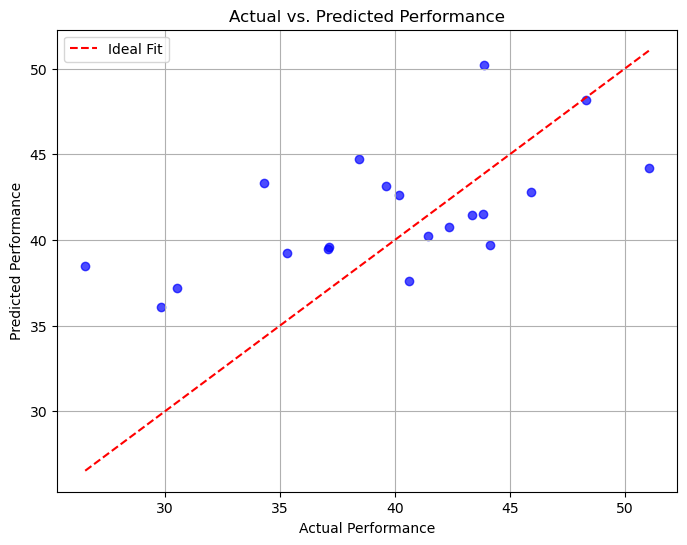

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Create a synthetic dataset( Use dataset Student Performance Dataset from kaggle)

np.random.seed(42)
num_samples = 100

# Features: Study Hours, Class Attendance, Assignment Scores
study_hours = np.random.randint(1, 10, num_samples)
class_attendance = np.random.randint(50, 100, num_samples)
assignment_scores = np.random.randint(60, 100, num_samples)

# Target: Student Performance (calculated with some noise)

student_performance = (
    0.5 * study_hours + 0.3 * class_attendance + 0.2 * assignment_scores + np.random.normal(0, 5, num_samples)
)

# Create a DataFrame

data = pd.DataFrame({
    'Study Hours': study_hours,
    'Class Attendance': class_attendance,
    'Assignment Scores': assignment_scores,
    'Performance': student_performance
})

# Step 2: Split the dataset into training and testing sets

X = data[['Study Hours', 'Class Attendance', 'Assignment Scores']]
y = data['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Multiple Linear Regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions

y_pred = model.predict(X_test)

# Step 5: Calculate metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Step 6: Scatter plot of actual vs. predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs. Predicted Performance')
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.legend()
plt.grid()
plt.show()